### 보스턴 주택 가격 데이터셋
##### 회귀(Regression)이란 개별적인 레이블 대신에 연속적인 값을 예측하는 것이다. 회귀 문제를 다루기 위해 1970년 중반 보스턴 외곽 지역의 범죄율, 지방세율 피처 등을 포함한 주택 가격 예측 데이터를 활용했다.
- 1970년 중반 보스턴 외곽 지역의 범죄율, 지방세율 등의 데이터가 주어졌을 때 주택 가격의 중간 값을 예측해본다.
- 여기서 사용할 데이터셋은 이전 두 개의 예제와 다르다.
- 데이터 포인트가 506개로 비교적 개수가 적고 404개는 훈련 샘플로 102개는 테스트 샘플로 나누어져 있다.
- 입력 데이터에 있는 각 특성(예를 들어 범죄율)은 스케일이 서로 다르다.
- 어떤 값은 0과 1 사이의 비율을 나타내고 어떤 것은 1과 12 사이의 값을 가지거나 1과 100 사이의 값을 가진다.


In [39]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [40]:
train_data.shape

(404, 13)

In [41]:
test_data.shape

(102, 13)

여기서 볼 수 있듯이 404개의 훈련 샘플과 102개의 테스트 샘플이 있고 모두 13개의 수치 특성을 가지고 있다.

타깃은 주택의 중간 가격으로 천달러 단위이다.

In [42]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

이 가격은 일반적으로 10,000달러에서 50,000달러 사이이다.
1970년대 중반의 가격이며 아직 인플레이션에 영향을 받지 않은 가격이다.

# 데이터 준비
- 상이한 스케일을 가진 값을 신경망에 주입하면 문제가 된다.
- 네트워크가 이런 다양한 데이터에 자동으로 맞추려고 할 수 있지만 이는 확실한 학습을 더 어렵게 만든다.
- 이런 데이터를 다룰 때 대표적인 방법은 특성별로 정규화를 하는 것이다.
- 입력 데이터에 있는 각 특성(입력 데이터 행렬의 열)에 대해서 특성의 평균을 빼고 표준 편차로 나눈다.
- 특성의 중앙이 0 근처에 맞춰지고 표준 편차가 1이 된다.

In [43]:
# 정규화
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

 테스트 데이터를 정규화할 때 사용한 값이 훈련 데이터에서 계산한 값임을 유의한다.

 머신 러닝 작업 과정에서 절대로 테스트 데이터에서 계산한 어떤 값도 사용해서는 안된다. 

In [44]:
test_data

array([[ 1.55369355, -0.48361547,  1.0283258 , ...,  0.78447637,
        -3.48459553,  2.25092074],
       [-0.39242675, -0.48361547, -0.16087773, ..., -0.30759583,
         0.42733126,  0.47880119],
       [-0.39982927, -0.48361547, -0.86940196, ...,  0.78447637,
         0.44807713, -0.41415936],
       ...,
       [-0.20709507, -0.48361547,  1.24588095, ..., -1.71818909,
         0.37051949, -1.49344089],
       [-0.36698601, -0.48361547, -0.72093526, ..., -0.48960787,
         0.39275481, -0.41829982],
       [-0.0889679 , -0.48361547,  1.24588095, ..., -1.71818909,
        -1.21946544, -0.40449827]])

In [45]:
print(train_data.mean())
print(train_data.std())

2.602301889250862e-15
0.9999999999999994


# 모델 구성
- 샘플의 개수가 적기 때문에 64개의 유닛을 가진 두 개의 은닉층으로 작은 네트워크를 구성하여 사용한다.
-  일반적으로 훈련 데이터의 개수가 적을수록 과대적합이 더 쉽게 일어나므로 작은 모델을 사용하는 것이 과대적합을 피하는 한 방법이다.

In [46]:
from keras.engine import input_spec
from keras import models
from keras import layers

# 동일한 모델을 여러 번 생성할 것이므로 사용자 함수 만들어 사용한다.
def build_model(): 
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1)) # 주택 가격예측이므로 출력층은 그 값 자체를 출력해줘야함(활성화 함수 설정하면 안됨) 
 
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'])
  return model

- 네트워크를 보면, 마지막 층은 하나의 유닛을 가지고 있고 활성화 함수가 없다. 이를 선형 층이라고 부르는데, 이것이 전형적인 스칼라 회귀(하나의 연속적인 값을 예측하는 회귀)를 위한 구성이다.

- 활성화 함수를 적용하면 출력값의 범위를 제한하는데, 마지막 층이 순수한 선형이므로 네트워크가 어떤 범위의 값이라도 예측하도록 자유롭게 학습된다.

- 이 모델은 mse 손실 함수를 사용하여 컴파일한다. mse는 평균 제곱 오차(mean squared error)의 약어로 예측과 타깃 사이의 거리의 제곱이다. 또한 평가 지표로는 평균 절대 오차(Mean Absolute Error, MAE)를 사용한다. 이는 예측과 타깃 사이 거리의 절댓값이다.

이 네트워크의 마지막 층은 하나의 유닛을 가지고 있고 활성화 함수가 없다(선형 층이라고도 부른다). 
- 이것이 전형적인 스칼라 회귀(하나의 연속적인 값을 예측하는 회귀)를 위한 구성이다.
- 활성화 함수를 적용하면 출력 값의 범위를 제한하게 된다.
- 예를 들어 마지막 층에 sigmoid 활성화 함수를 적용하면 네트워크가 0과 1사이의 값을 예측하도록 학습될 것이다.
- 여기서는 마지막 층이 순수한 선형이므로 네트워크가 어떤 범위 값이라도 예측하도록 자유롭게 학습된다.

이 모델은 mse 손실 함수를 사용하여 컴파일한다.
- 이 함수는 평균 제곱 오차(mean squared error)의 약자로 예측과 타깃 사이 거리의 제곱이다.
- 회귀 문제에서 널리 사용되는 손실 함수이다.
- 훈련하는 동안 모니터링을 위해 새로운 지표인 평균 절대 오차를 측정한다. 이는 예측과 타깃 사이 거리의 절댓값이다.
- 예를 들어 이 예제에서 MAE가 0.5이면 예측이 평균적으로 $500 정도 차이가 난다는 뜻이다.

# K-fold 검증을 사용한 훈련 검증
(훈련에 사용할 epochs의 수 같은) 매개변수들을 조정하면서 모델을 평가하기 위해 이전 예제에서 했던 것처럼 데이트를 훈련 세트와 검증 세트로 나눈다.<br><br>

현재 사용 중인 데이터 셋은 데이터의 크기가 크지 않다.(훈련 데이터 404개, 테스트 데이터 102개) 따라서 이 데이터 셋을 훈련 세트와 검증 세트로 나눌 경우, 각각 어떤 데이터 포인트가 선택되었는지에 따라 검증 점수가 크게 달라지고, 검증 세트의 분할에 대한 검증 점수의 분산이 높아져 신뢰 있는 모델 평가를 할 수 없다. <br><br>

이렇듯 데이터 크기가 작은 경우 가장 좋은 방법은 K-겹 교차 검증(K-fold cross-validation)을 사용하는 것이다. 이는 데이터를 K 개의 분할(fold)로 나누고(일반적으로 K=4 혹은 5) K 개의 모델을 각각 만들어 K-1개의 분할에서 훈련하고 나머지 분할에서 평가하는 방법이다. 모델의 검증 점수는 K 개의 검증 점수 평균이 된다.

In [47]:
from functools import partial
from keras.layers import kernelized

# k-fold cross validation
import numpy as np

k = 4
num_val_samples = len(train_data) // k  
num_epochs = 100
all_scores = []
for i in range(k):
    print('처리중인 폴드 #', i)
    # 검증 데이터 준비: k번째 분할
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # 훈련 데이터 준비: 다른 분할 전체
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # 케라스 모델 구성(컴파일 포함)
    model = build_model()
    # 모델 훈련(verbose=0 이므로 훈련 과정이 출력되지 않습니다)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    
    # 검증 세트로 모델 평가
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [48]:
all_scores

[2.0726490020751953, 3.1910572052001953, 2.44046950340271, 2.4978294372558594]

In [49]:
np.mean(all_scores)

2.55050128698349

검증 세트가 다르므로 확실히 검증 점수가 2.0에서 2.8까지 변화가 크다. 평균값(2.5)이 각각의 점수보다 훨씬 신뢰할 만한 점수이다. 이것이 K-fold 교차 검증의 핵심이라고 할 수 있다.

이 예제에서는 평균적으로 3,000달러 정도 차이가 난다. 주택 가격의 범위가 10,000달러에서 50,000달러 사이인 것을 감안하면 비교적 큰 값이다.

신경망을 조금 더 오래 500 epochs 동안 훈련해 보도록 한다. 각 epochs 모델이 얼마나 개선되는지 기록하기 위해 훈련 루프를 조금 수정해서 에포크의 검증 점수를 로그에 저장하여 출력한다.

In [50]:
from tensorflow.keras import backend as K
# 메모리 해제
K.clear_session()

### num_epochs = 500을 적용하여 모델 학습 및 평가 수행

In [51]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
  print('처리중인 폴드 #', i)

  # 검증 데이터 준비: k번째 분할
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

  # 훈련 데이터 준비: 다른 분할 전체
  partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
  partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
  
  # 케라스 모델 구성(컴파일 포함)
  model = build_model()
  # 모델 훈련(verbose=0 이므로 훈련 과정이 출력되지 않습니다)
  history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


모든 fold에 대해 epochs의 MAE 점수의 평균을 계산한다.

In [52]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


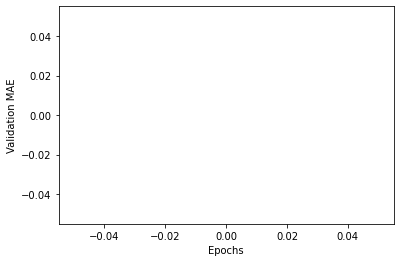

In [53]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

이 그래프는 범위가 크고 변동이 심하기 때문에 보기가 좀 어렵다

- 곡선의 다른 부분과 스케일이 많이 다른 첫 10개 데이터 포인트를 제외시킨다.
- 부드러운 곡선을 얻기 위해 각 포인트를 이전 포인트의 지수 이동 평균으로 대체한다.

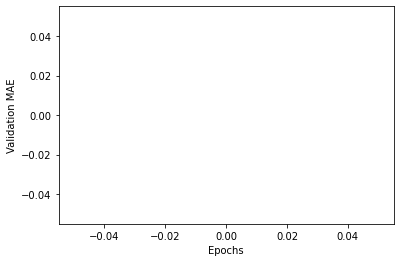

In [54]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

그래프를 보면 검증 MAE가 80번째 에포크 이후에 줄어드는 것이 멈추어졌다. 이 지점 이후로는 과대적합이 시작된다.

모델의 다른 매개변수에 대한 튜닝이 끝나면(에포크 수뿐만 아니라 은닉층의 크기도 조절할 수 있다) 모든 훈련 데이터를 사용하고 최상의 매개변수로 최종 실전에 투입될 모델을 훈련시킨다. 그다음 테스트 데이터로 성능을 확인한다.

In [55]:
# 최종 모델
model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

print(test_mae_score)

4/4 [==============================] - 0s 3ms/step - loss: 23.5639 - mean_absolute_error: 3.3073
3.3073198795318604


2,675달러 정도 차이가 나는것을 확인할 수 있다.

#정리

- 회귀는 분류에서 사용했던 것과는 다른 손실 함수를 사용한다. 
- 평균 제곱 오차(MSE)는 회귀에서 자주 사용되는 손실 함수이다.
- 비슷하게 회귀에서 사용되는 평가 지표는 분류와 다릅니다. 정확도 개념은 회귀에 적용되지 않는다. 
- 일반적인 회귀 지표는 평균 절대 오차(MAE)이다.
- 입력 데이터의 특성이 서로 다른 범위를 가지면 전처리 단계에서 각 특성을 개별적으로 스케일 조정해야 한다.
- 가용한 데이터가 적다면 K-fold 검증을 사용하는 것이 모델을 신뢰있게 평가 하는 방벙디다.
- 가용한 훈련 데이터가 적다면 과대적합을 피하기 위해 은닉층의 수를 줄인 모델(일반적으로 하나 또는 두 개)이 좋다.